<a href="https://colab.research.google.com/github/apeksha1220/BML/blob/main/LCA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset loaded successfully!

Shape of dataset: (4521, 17)

First 5 rows:
    age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  

--- Missing Values ---
age       

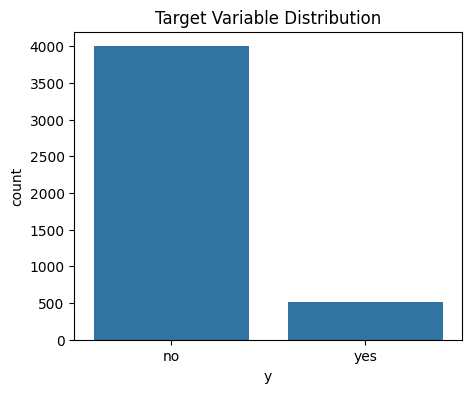

/tmp/ipython-input-285343734.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
/tmp/ipython-input-285343734.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
/tmp/ipython-input-285343734.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


--- Model Evaluation ---
Accuracy: 0.8939226519337017

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       807
           1       0.53      0.18      0.27        98

    accuracy                           0.89       905
   macro avg       0.72      0.58      0.61       905
weighted avg       0.87      0.89      0.87       905



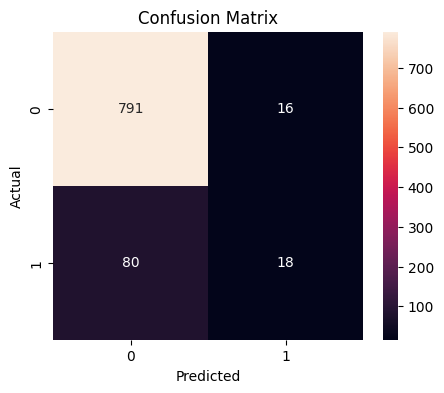

In [ ]:
# ---------------------------------------------
# Bank Marketing Dataset - Predict Term Deposit
# ---------------------------------------------

# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Load dataset from local file path instead of URL
file_path = "/content/bank_cleaned.csv"   # <-- Updated Path
df = pd.read_csv(file_path)

# Step 3: Display basic info
print("✅ Dataset loaded successfully!\n")
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())

# Step 4: Basic EDA
print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Target Variable Distribution ---")
print(df['y'].value_counts())

plt.figure(figsize=(5,4))
sns.countplot(x='y', data=df)
plt.title('Target Variable Distribution')
plt.show()

# Step 5: Select a few important features manually for simplicity
selected_features = ['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'duration', 'campaign']
data = df[selected_features + ['y']]

# Step 6: Encode categorical features
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

# Step 7: Split features and target
X = data.drop('y', axis=1)
y = data['y']

# Step 8: Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 9: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 10: Choose and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 11: Predictions and evaluation
y_pred = model.predict(X_test)

print("\n--- Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 12: Confusion Matrix Visualization
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()